In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle
from numpy import sin, cos, pi
import numpy as np
from scipy.integrate import odeint
from IPython.display import HTML


import matplotlib as mpl

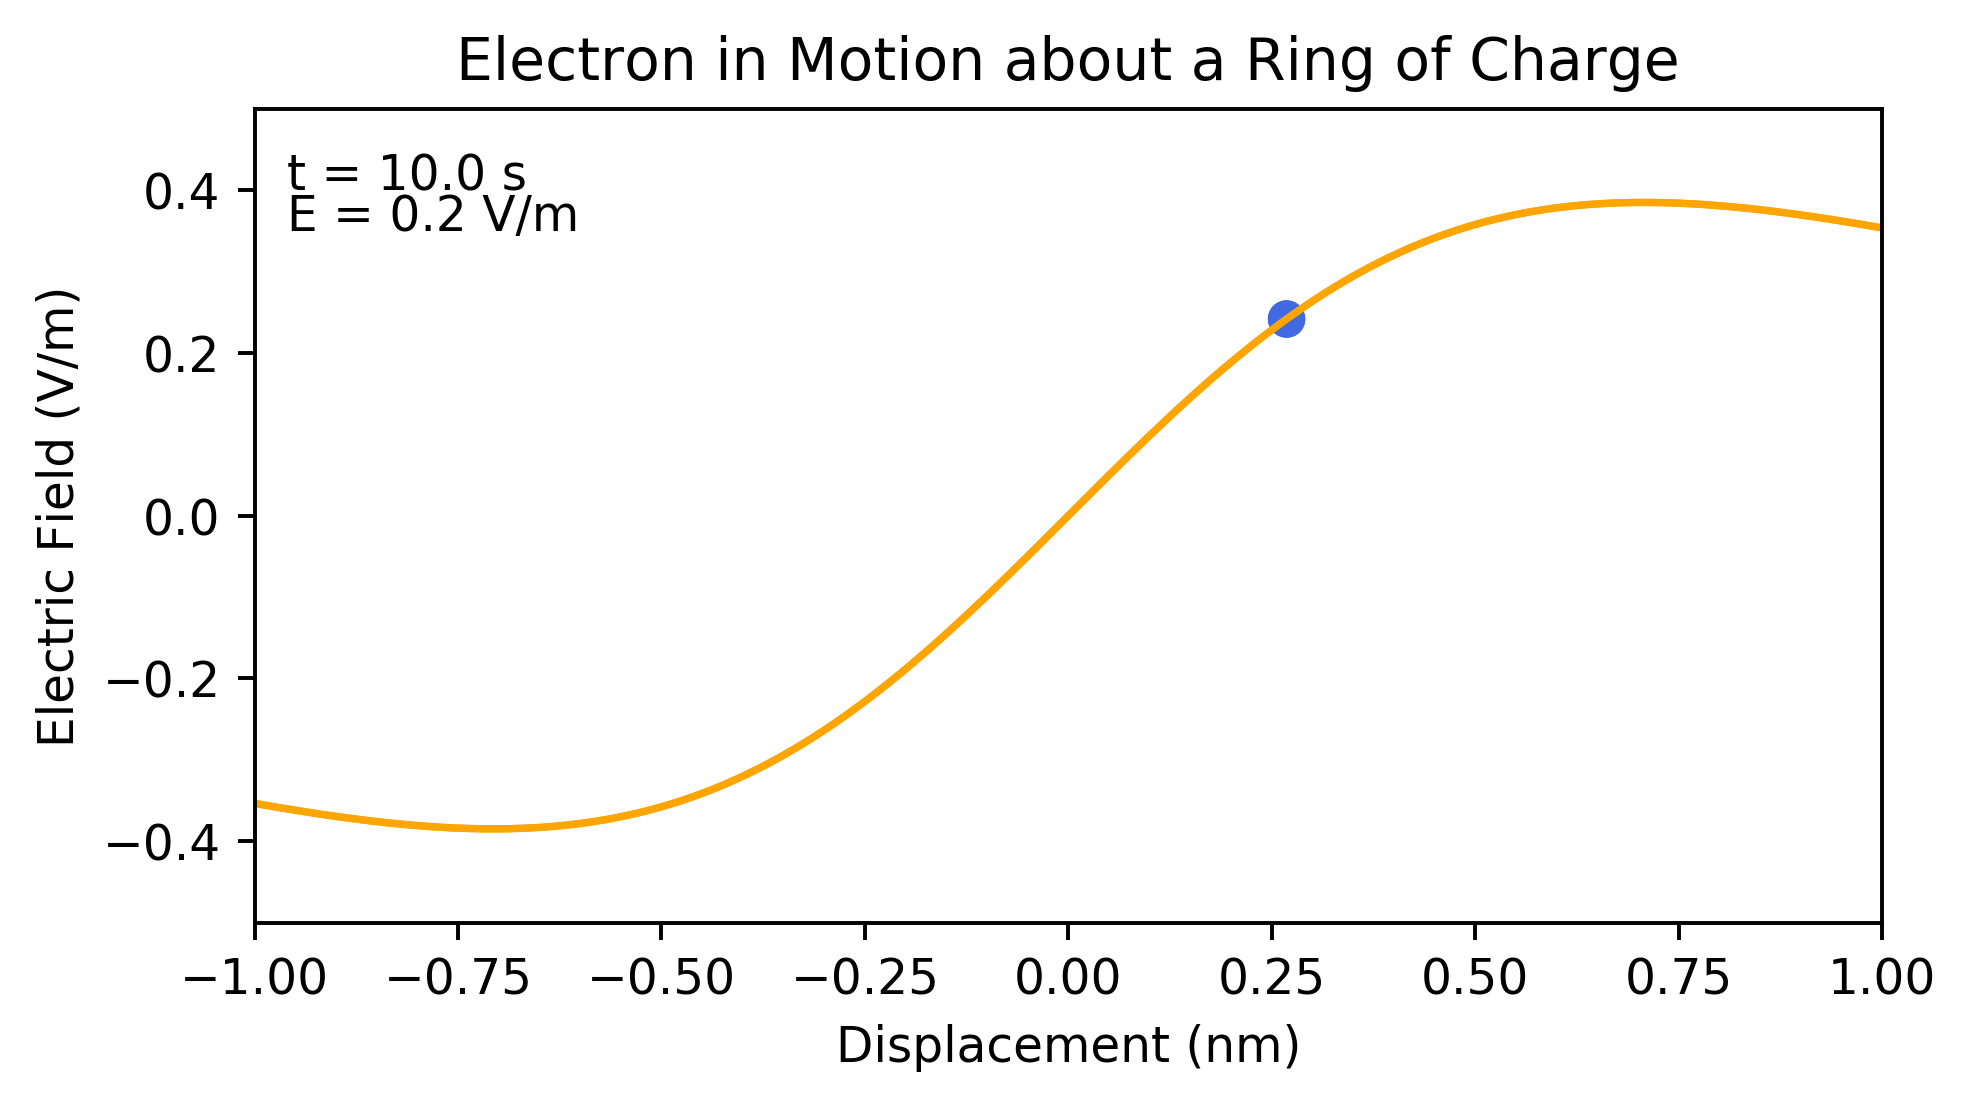

In [4]:
mpl.rcParams['figure.dpi'] = 350

def E_of_ring(x, R = 1):
    return x/(x**2+R**2)**(3/2)


def charged_ring_ode(conditions, t, q=-1, m = 0.5):
    x, v = conditions
    
    dydt = [v, (q/m)*E_of_ring(x)]
    return dydt

x_inital = 0.1
v_inital = 0.5

iterations = 500
t_max = 10

t_list = np.linspace(0, t_max, iterations)

solutions = odeint(charged_ring_ode, [x_inital, v_inital], t_list)
# odeint solves for θ and ω over the interval in t_list, it pases conditions = [θ_inital, ω_inital] 
# for the first call of simple_pendulum_ode().

x_solution_list = [i[0] for i in solutions]
#y_list = [0 for x in x_solution_list]
#x_list = [x[0] for x in x_solution_list]

fig = plt.figure()

ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-1, 1), ylim=(-0.5, 0.5))

time_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.85, '', transform=ax.transAxes)

patch = Circle((0, 0), radius = 0.02, color ='royalblue')

def init():
    plt.xlabel('Displacement (nm)')
    plt.ylabel('Electric Field (V/m)')
    plt.title('Electron in Motion about a Ring of Charge')
    
    x_list = np.linspace(-2, 2, 300)
    E_list = np.array([E_of_ring(x) for x in x_list])
    plt.plot(x_list, E_list, color = 'orange')
    

    ax.add_patch(patch)
    return patch, time_text, energy_text

def animate(i):
    x, y = patch.center
    
    x = x_solution_list[i]
    y = E_of_ring(x_solution_list[i])
    
    time = t_max/iterations*i
    time_text.set_text(f't = {time:.1f} s')
    energy_text.set_text(f'E = {y:.1f} V/m')
    
    patch.center = (x, y)
    return patch, time_text, energy_text

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=iterations, 
                               interval=30,
                               blit=True)


anim.save("electron-charged-ring.mp4")